# Exploratory Data Analysis

Provide a high-level overview of the cleaned dataset (roles, locations, sources, and basic job attributes).

## Import Libraries and Data

In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('E:/Projects/Python_Data_Project/job_postings_flat_cleaned.csv')

## Roles to Explore

Summarize the distribution of job postings by role and identify the most common roles.

In [69]:
df_roles = df['job_title_short'].value_counts().to_frame()

df_roles

,count
job_title_short,
Data Analyst,387293
Data Engineer,372057
Data Scientist,312033
Business Analyst,100890
Software Engineer,91815
Senior Data Engineer,88654
Senior Data Scientist,68180
Senior Data Analyst,58247
Machine Learning Engineer,41077


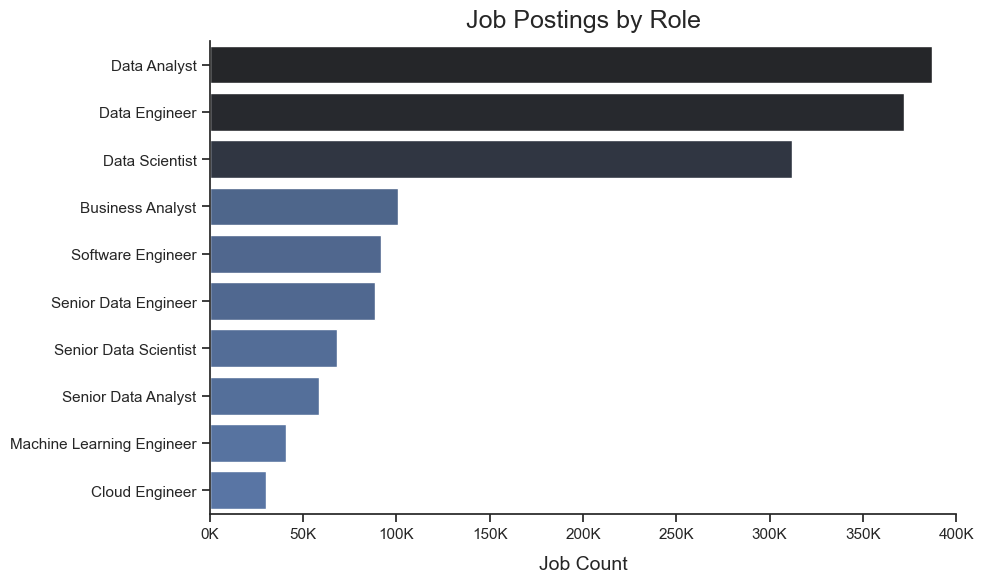

In [70]:
sns.set_theme(style='ticks')
plt.figure(figsize=(10, 6))

ax = sns.barplot(
    data=df_roles,
    x='count',
    y='job_title_short',
    hue='count',
    palette='dark:b_r',
    legend=False
)

ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{int(x/1000)}K'))

sns.despine()
plt.title('Job Postings by Role', fontsize=18, pad=10)
plt.xlabel('Job Count', fontsize=14, labelpad=10)
plt.ylabel('')
plt.xlim(0, 400000)
plt.tight_layout()
plt.show()

In [71]:
vc = df["job_title_short"].value_counts()
total = vc.sum()
top3 = vc.head(3)

print(
    f"Top 3 roles: "
    f"{top3.index[0]} ({top3.iloc[0] / total * 100:.2f}%), "
    f"{top3.index[1]} ({top3.iloc[1] / total * 100:.2f}%), "
    f"{top3.index[2]} ({top3.iloc[2] / total * 100:.2f}%).\n"
    f"Together, these top 3 roles account for {top3.sum() / total * 100:.2f}% of all job postings."
)

Top 3 roles: Data Analyst (24.98%), Data Engineer (24.00%), Data Scientist (20.13%).
Together, these top 3 roles account for 69.11% of all job postings.


## Countries to Explore

Review the country distribution to understand where the postings in this dataset come from.

In [72]:
df_countries = df['job_country'].value_counts().to_frame().head(10)

df_countries

,count
job_country,
United States,457149
India,110565
United Kingdom,101821
France,64917
Germany,46880
Canada,45135
Spain,42848
Singapore,40227
Netherlands,32665


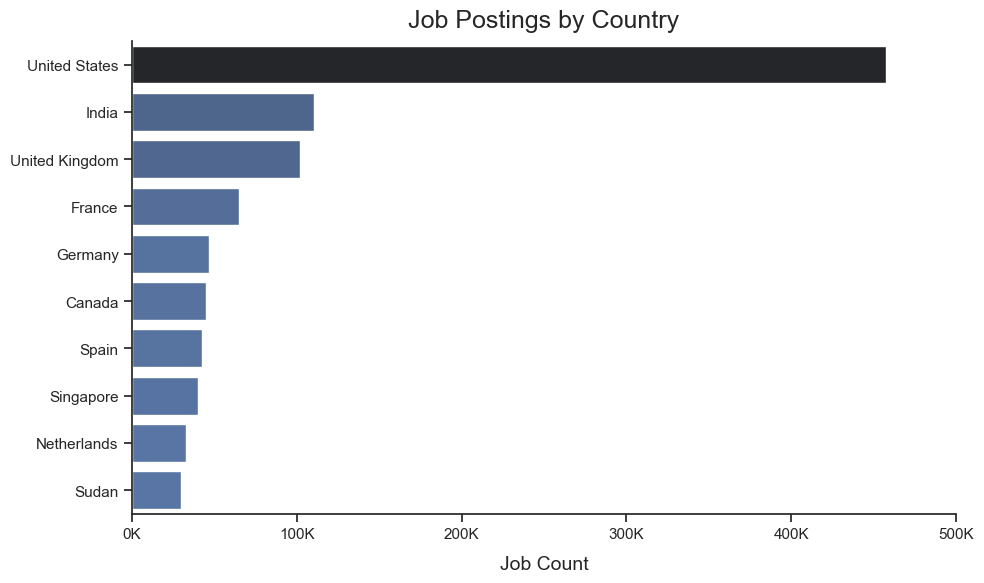

In [73]:
sns.set_theme(style='ticks')
plt.figure(figsize=(10, 6))

ax = sns.barplot(
    data=df_countries,
    x='count',
    y='job_country',
    hue='count',
    palette='dark:b_r',
    legend=False
)

ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{int(x/1000)}K'))

sns.despine()
plt.title('Job Postings by Country', fontsize=18, pad=10)
plt.xlabel('Job Count', fontsize=14, labelpad=10)
plt.ylabel('')
plt.xlim(0, 500000)
plt.tight_layout()
plt.show()

In [74]:
vc = df["job_country"].value_counts()
total = vc.sum()

usa = vc.get("United States", 0)
next3 = vc.drop(index="United States", errors="ignore").head(3)

top4_sum = usa + next3.sum()

print(
    f"United States accounts for {usa / total * 100:.2f}% of all postings. "
    f"Next: {next3.index[0]} ({next3.iloc[0] / total * 100:.2f}%), "
    f"{next3.index[1]} ({next3.iloc[1] / total * 100:.2f}%), and "
    f"{next3.index[2]} ({next3.iloc[2] / total * 100:.2f}%).\n"
    f"Together, these top 4 countries account for {top4_sum / total * 100:.2f}% of all postings."
)

United States accounts for 29.51% of all postings. Next: India (7.14%), United Kingdom (6.57%), and France (4.19%).
Together, these top 4 countries account for 47.40% of all postings.


## Platforms to Explore

Standardize platform/source labels and check which platforms contribute the most postings.

In [75]:
df["job_via"] = df["job_via"].fillna("Unknown").astype(str)
s = df["job_via"].str.lower()

rules = [
    ("linkedin", "LinkedIn"),
    ("bebee", "BeBee"),
    ("indeed", "Indeed"),
    (r"trabajo\s*\.?\s*org", "Trabajo.org"),
    (r"recruit\.net", "Recruit.net"),
    (r"\bdice\b", "Dice"),
]

for pat, label in rules:
    df.loc[s.str.contains(pat, regex=True), "job_via"] = label

In [76]:
df_platforms = df['job_via'].value_counts().to_frame().head(10)

df_platforms

,count
job_via,
LinkedIn,410413
BeBee,392956
Trabajo.org,146941
Indeed,87563
Recruit.net,43472
ZipRecruiter,31601
Snagajob,16929
Jooble,16215
Dice,11604


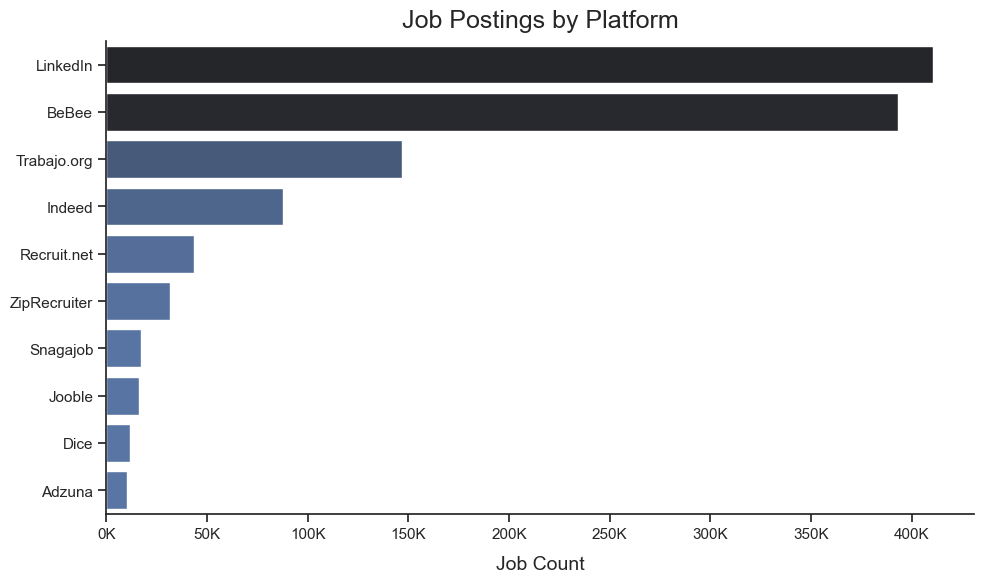

In [77]:
sns.set_theme(style='ticks')
plt.figure(figsize=(10, 6))

ax = sns.barplot(
    data=df_platforms,
    x='count',
    y='job_via',
    hue='count',
    palette='dark:b_r',
    legend=False
)

ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{int(x/1000)}K'))
sns.despine()
plt.title('Job Postings by Platform', fontsize=18, pad=10)
plt.xlabel('Job Count', fontsize=14, labelpad=10)
plt.ylabel('')
plt.tight_layout()
plt.show()

In [78]:
vc = df["job_via"].value_counts()
total = vc.sum()
top4 = vc.head(4)

print(
    f"Top 4 platforms: "
    f"{top4.index[0]} ({top4.iloc[0] / total * 100:.2f}%), "
    f"{top4.index[1]} ({top4.iloc[1] / total * 100:.2f}%), "
    f"{top4.index[2]} ({top4.iloc[2] / total * 100:.2f}%), and "
    f"{top4.index[3]} ({top4.iloc[3] / total * 100:.2f}%).\n"
    f"Together, these top 4 platforms account for {top4.sum() / total * 100:.2f}% of all job postings.\n"
    "Platform shares reflect data sources/aggregation, not employer market share."
)

Top 4 platforms: LinkedIn (26.47%), BeBee (25.35%), Trabajo.org (9.48%), and Indeed (5.65%).
Together, these top 4 platforms account for 66.95% of all job postings.
Platform shares reflect data sources/aggregation, not employer market share.


## Companies to Explore

Identify top employers by posting volume after excluding job boards, recruiters, and generic sources.

In [79]:
exclude = {
    "BeBee", "Dice", "Confidential", "Unknown",
    "Emprego", "Listopro", "VirtualVocations", "ClickJobs.io", "Upwork",
    "Get.It", "Women For Hire- Job Board", "Jobs",
    "Harnham", "Insight Global", "SynergisticIT", "Robert Half", "Michael Page",
    "Randstad", "Hays", "Motion Recruitment", "Jobot", "Experis", "Diverse Lynx",
    "Get It Recruit - Information Technology", "OpenClassrooms"
}

df_employers = df[~df["company_name"].isin(exclude)].copy()

In [80]:
df_companies = df_employers["company_name"].value_counts().to_frame().head(10)
df_companies

,count
company_name,
Capital One,6188
Amazon,5596
Booz Allen Hamilton,3901
Walmart,3473
Capgemini,3083
Deloitte,3082
Citi,2897
Tata Consultancy Services,2810
EY,2458


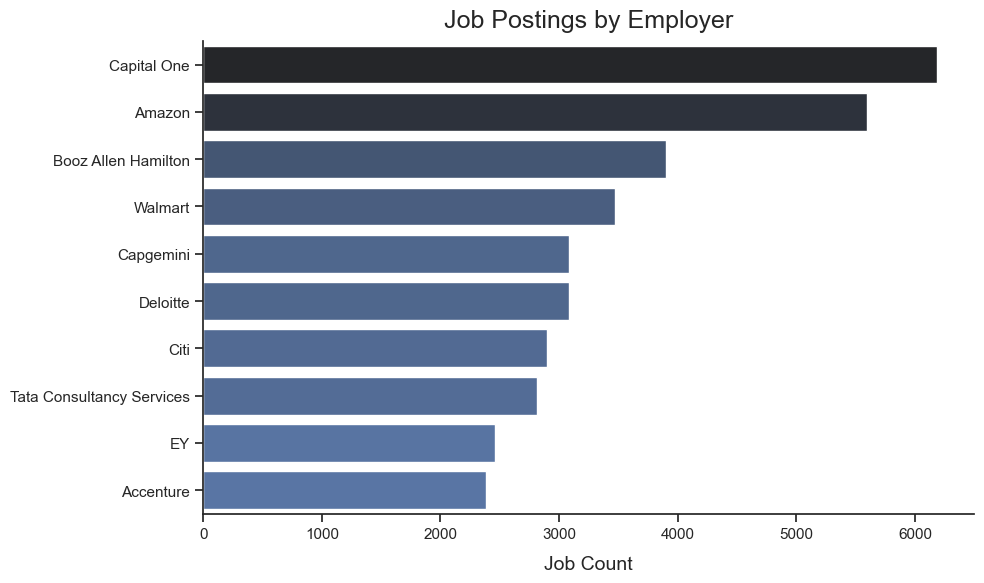

In [81]:
sns.set_theme(style="ticks")
plt.figure(figsize=(10, 6))

ax = sns.barplot(
    data=df_companies,
    x="count",
    y="company_name",
    hue="count",
    palette="dark:b_r",
    legend=False
)

sns.despine()
plt.title("Job Postings by Employer", fontsize=18, pad=10)
plt.xlabel("Job Count", fontsize=14, labelpad=10)
plt.ylabel("")
plt.tight_layout()
plt.show()

## Schedule Type

Calculate how large a share of postings are full-time.

In [82]:
pct_full_time = df["job_schedule_type"].eq("Full-time").mean() * 100
print(f"Full-time accounts for {pct_full_time:.2f}% of all job postings.")

Full-time accounts for 87.24% of all job postings.


## Job Opportunities

Visualize the share of postings that offer remote work, mention no degree requirement, and offer health insurance.

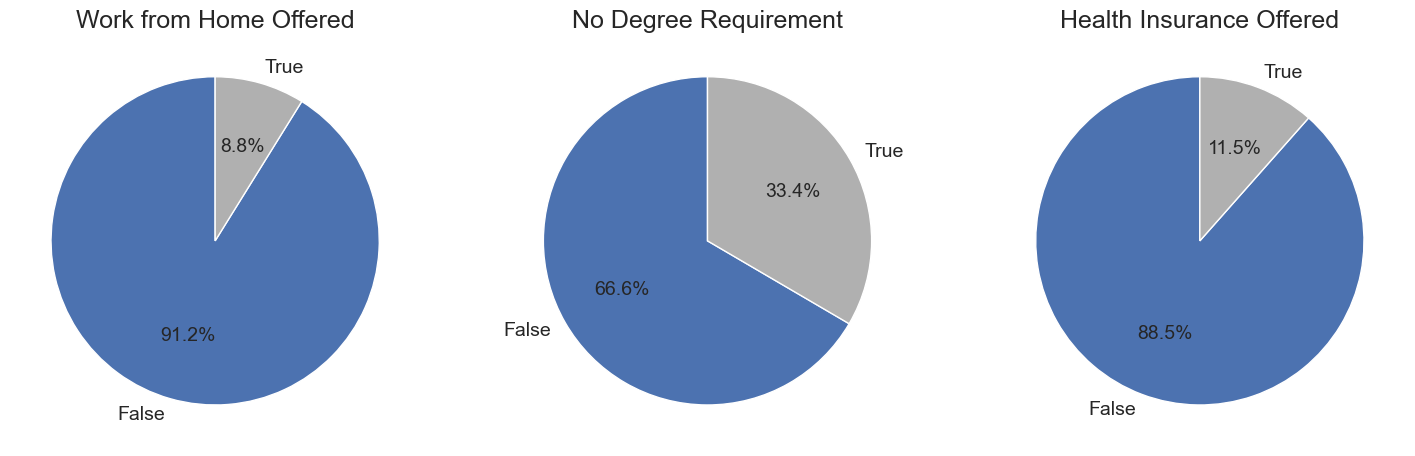

In [83]:
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'No Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3)
fig.set_size_inches((18, 8))

for i, (column, title) in enumerate(dict_column.items()):
    counts = df[column].value_counts().reindex([False, True], fill_value=0)

    ax[i].pie(
        counts,
        labels=['False', 'True'],
        autopct='%1.1f%%',
        startangle=90,
        colors=['#4c72b0', '#b0b0b0'],
        textprops={'fontsize': 14}
    )
    ax[i].set_title(title, fontsize=18)

plt.show()
